In [1]:
import time 
from time import perf_counter
import random
import matplotlib.pyplot as plt
import statistics

In [2]:
def benchmark(sorting_algorithm, input_list):
    """
    Performs 3 tests on the sorting algorithm given an input list, where the input is shuffled, sorted, and reversed
    Return: Average of 5 benchmark times for each algorithm on an input list
    """
    shuffle_input_list = input_list.copy()
    #Shuffled list
    random.shuffle(shuffle_input_list)
    start_time = time.perf_counter()
    sorting_algorithm(shuffle_input_list)
    shuffled_benchmark_time = time.perf_counter() - start_time
    print("shuffled list")
    
    sort_input_list = input_list.copy()
    #Sorted List
    sort_input_list.sort()
    start_time = time.perf_counter()
    sorting_algorithm(sort_input_list)
    sorted_benchmark_time = time.perf_counter() - start_time
    print("sorted list")
    
    reverse_input_list = input_list.copy()
    #Reversed List
    reverse_input_list.reverse()
    start_time = time.perf_counter()
    sorting_algorithm(reverse_input_list)
    reversed_benchmark_time = time.perf_counter() - start_time
    print("reversed list")
    return (shuffled_benchmark_time, sorted_benchmark_time, reversed_benchmark_time)

In [3]:
def insertion_sort(arr):
    for i in range(1,len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = key 

def selection_sort(arr):
    for j in range(0, len(arr)-1):
        smallest = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[smallest]:
                smallest = i
        temp = arr[j]
        arr[j] = arr[smallest]
        arr[smallest] = temp

def generate_input_list(n):
    return [random.randint(0,100) for _ in range(n)]

list_sizes = [100,1000,10000]#,100000,1000000,1000000]
# list_sizes = [100,1000,100000]

#Lists to hold the benchmark times for each algorithm
sorted_times_insertion = []
shuffled_times_insertion = []
reversed_times_insertion = []
sorted_times_selection = []
shuffled_times_selection = []
reversed_times_selection = []
trial_count = 3
for list_size in list_sizes: 
    #Lists will hold the benchmark times for sorting of size n
    selection_shuffled_times = []
    selection_sorted_times = []
    selection_reversed_times = []
    insertion_shuffled_times = []
    insertion_sorted_times = []
    insertion_reversed_times = []
    for trial in range(trial_count):
        #Data is randomly generated
        data = generate_input_list(list_size)
        #Selection sort
        benchmark_times = benchmark(selection_sort,data)

        shuffled_time = benchmark_times[0]
        sorted_time = benchmark_times[1]
        reversed_time = benchmark_times[2]
        
        selection_shuffled_times.append(shuffled_time)
        selection_sorted_times.append(sorted_time)
        selection_reversed_times.append(reversed_time)
        
        #Insertion Sort
        benchmark_times_insertion_sort = benchmark(insertion_sort,data)

        shuffled_time = benchmark_times[0]
        sorted_time = benchmark_times[1]
        reversed_time = benchmark_times[2]
        
        #Times for insertion sort with list size N
        insertion_shuffled_times.append(shuffled_time)
        insertion_sorted_times.append(sorted_time)
        insertion_reversed_times.append(reversed_time)
        print(trial)
        
    #The average time of selection sort algorithm for sorted, shuffled, and reversed input lists of size n
    selection_sorted_average_time = statistics.fmean(selection_sorted_times)
    selection_shuffled_average_time = statistics.fmean(selection_shuffled_times)
    selection_reversed_average_time = statistics.fmean(selection_reversed_times)
    
    #The average time of insertion sort algorithm for sorted, shuffled, and reversed input lists of size n
    insertion_sorted_average_time = statistics.fmean(selection_sorted_times)
    insertion_shuffled_average_time = statistics.fmean(selection_sorted_times)
    insertion_reversed_average_time = statistics.fmean(selection_reversed_times)
    
    sorted_times_selection.append(selection_sorted_average_time)
    shuffled_times_selection.append(selection_shuffled_average_time)
    reversed_times_selection.append(selection_reversed_average_time)

    sorted_times_insertion.append(insertion_sorted_average_time)
    shuffled_times_insertion.append(insertion_shuffled_average_time)
    reversed_times_insertion.append(insertion_reversed_average_time)
    print(list_size)

shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
100
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
1000
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
10000


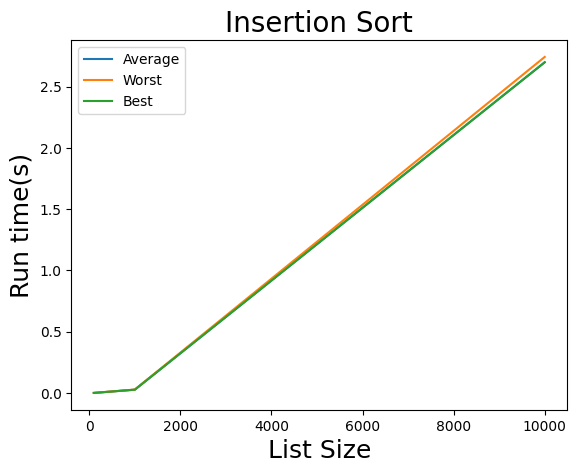

In [4]:
plt.plot(list_sizes, shuffled_times_insertion, label="Average")
plt.plot(list_sizes, reversed_times_insertion, label="Worst")
plt.plot(list_sizes, sorted_times_insertion, label="Best")

plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run time(s)", fontsize = 18)
plt.title("Insertion Sort", fontsize = 20)
plt.legend()

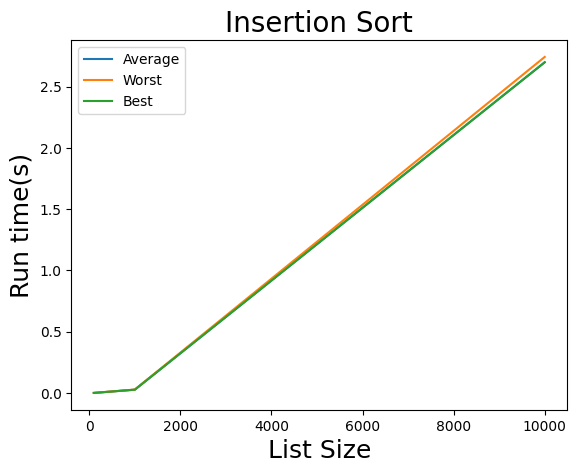

In [5]:
plt.plot(list_sizes, shuffled_times_insertion, label="Average")
plt.plot(list_sizes, reversed_times_insertion, label="Worst")
plt.plot(list_sizes, sorted_times_insertion, label="Best")

plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run time(s)", fontsize = 18)
plt.title("Insertion Sort", fontsize = 20)
plt.legend()

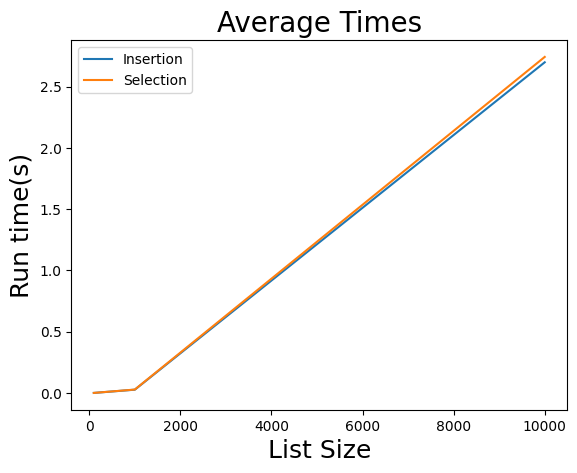

In [6]:
plt.plot(list_sizes, shuffled_times_insertion, label="Insertion")
plt.plot(list_sizes, shuffled_times_selection, label="Selection")

plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run time(s)", fontsize = 18)
plt.title("Average Times", fontsize = 20)
plt.legend()

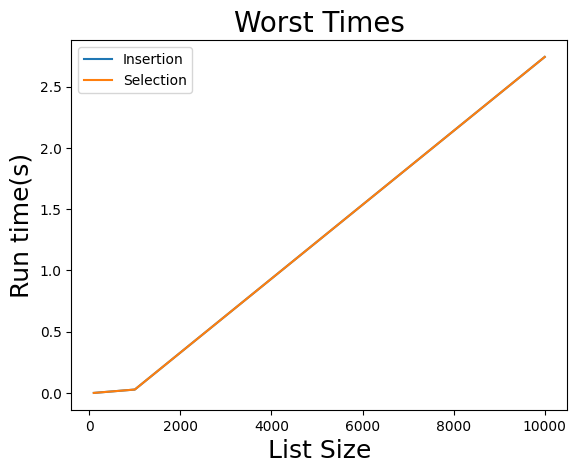

In [7]:
plt.plot(list_sizes, reversed_times_insertion, label="Insertion")
plt.plot(list_sizes, reversed_times_selection, label="Selection")

plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run time(s)", fontsize = 18)
plt.title("Worst Times", fontsize = 20)
plt.legend()

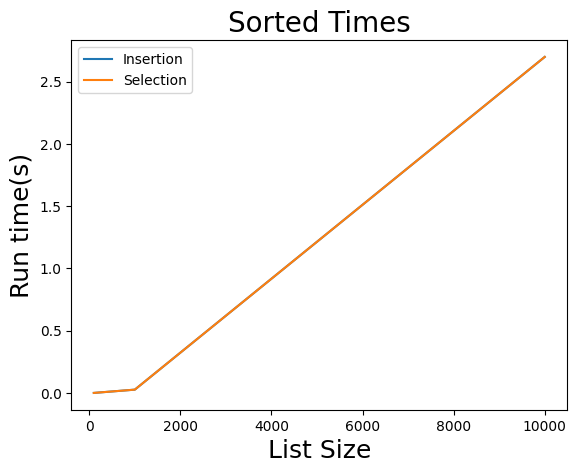

In [8]:
plt.plot(list_sizes, sorted_times_insertion, label="Insertion")
plt.plot(list_sizes, sorted_times_selection, label="Selection")

plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run time(s)", fontsize = 18)
plt.title("Sorted Times", fontsize = 20)
plt.legend()